# 1- Import Libraries

Import all the libraries needed in the project.

In [1]:
!pip install keras

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# 2- Load Model

Call the model to run the program.

In [4]:
# Load Model
model = load_model('model_imp.h5')

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


# 3- Load Data Inference

The next step is that we try to take some sample X-ray images to train the model and see the prediction results whether they are accurate or not.

In [5]:
class_names = ['Covid', 'Normal', 'Viral Pneumonia']
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


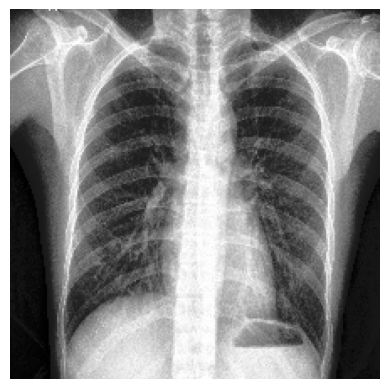

1/1 [==============================] - 1s 1s/step
Result     :  [[7.282e-03 9.800e-01 1.268e-02 4.172e-07 2.265e-06 2.563e-06]]
Max Class  :  1
Class Name :  Normal



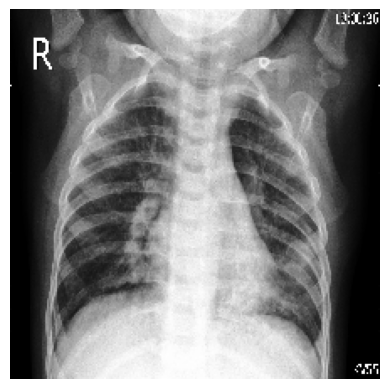

1/1 [==============================] - 1s 702ms/step
Result     :  [[5.0068e-06 1.4786e-02 9.8535e-01 0.0000e+00 4.7684e-07 4.7684e-07]]
Max Class  :  2
Class Name :  Viral Pneumonia



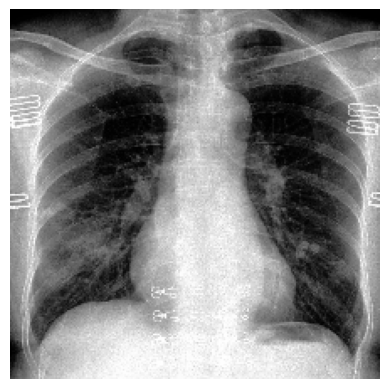

1/1 [==============================] - 1s 708ms/step
Result     :  [[9.902e-01 4.551e-03 4.696e-03 0.000e+00 1.788e-07 5.960e-08]]
Max Class  :  0
Class Name :  Covid



In [13]:
# Test Images
img_paths = ['05.jpeg', # Normal
             '061.jpeg', # Viral Pneumonia
             '08.jpeg'] # Covid

target_size = (220, 220, 3)  # Or whatever dimensions you prefer

for filename in img_paths:
  img = image.load_img(filename, target_size=target_size)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 220.0

  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')